# Загрузка и первичный анализ данных
Датасет взят с https://www.kaggle.com/competitions/titanic/overview и представляет собой набор данных о пассажирах титаника

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [35]:
# Будем использовать только обучающую выборку
data = pd.read_csv('train.csv', sep=",")

In [36]:
# размер набора данных
data.shape

(891, 12)

In [37]:
# типы колонок
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [38]:
# проверим есть ли пропущенные значения
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
# Первые 5 строк датасета
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 891


# Обработка пропусков в данных

In [41]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((891, 12), (891, 9))

In [42]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((891, 12), (183, 12))

In [43]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# "Внедрение значений" - импьютация (imputation)
## Обработка пропусков в числовых данных

In [44]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Age. Тип данных float64. Количество пустых значений 177, 19.87%.


In [45]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


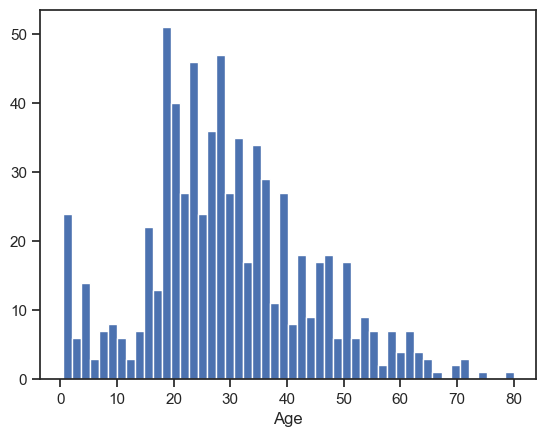

In [46]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [47]:
data_num_MasVnrArea = data_num[['Age']]
data_num_MasVnrArea.head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [48]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [49]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_MasVnrArea)
mask_missing_values_only

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [50]:
strategies=['mean', 'median', 'most_frequent']

In [51]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_MasVnrArea)
    return data_num_imp[mask_missing_values_only]

In [52]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911

In [53]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
        28., 28., 28., 28., 28., 28., 28

In [54]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 24., 24., 24., 

In [55]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [56]:
data[['Age']].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [57]:
test_num_impute_col(data, 'Age', strategies[0])

('Age', 'mean', 177, 29.69911764705882, 29.69911764705882)

In [58]:
test_num_impute_col(data, 'Age', strategies[1])

('Age', 'median', 177, 28.0, 28.0)

In [59]:
test_num_impute_col(data, 'Age', strategies[2])

('Age', 'most_frequent', 177, 24.0, 24.0)

# Преобразование категориальных признаков в числовые

## Использование LabelEncoder

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
df = pd.DataFrame(data)

In [62]:
unique_values = df['Sex'].unique()

In [63]:
unique_values

array(['male', 'female'], dtype=object)

In [64]:
cat_enc_le = le.fit_transform(unique_values)

NameError: name 'le' is not defined

In [65]:
cat_enc_le

NameError: name 'cat_enc_le' is not defined

In [66]:
np.unique(cat_enc_le)

NameError: name 'cat_enc_le' is not defined

In [67]:
# В этом примере видно, что перед кодированием 
# уникальные значения признака сортируются в лексикографиеском порядке
le.inverse_transform([0, 1])

NameError: name 'le' is not defined

## Использование OrdinalEncoder

In [68]:
from sklearn.preprocessing import OrdinalEncoder

In [69]:
data_oe = data[['Sex']]
data_oe.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [70]:
imp4 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_oe_filled = imp4.fit_transform(data_oe)
data_oe_filled

array([['male'],
       ['female'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['female'],
       ['female'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['male'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['ma

In [71]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [72]:
# Уникальные значения признака
np.unique(cat_enc_oe[:, 0])

array([0., 1.])

In [73]:
# Наименования категорий в соответствии с порядковыми номерами
oe.categories_

[array(['female', 'male'], dtype=object)]

In [74]:
# Обратное преобразование
oe.inverse_transform(cat_enc_oe)

array([['male'],
       ['female'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['female'],
       ['female'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['male'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['ma

## Кодирование категорий наборами бинарных значений - one-hot encoding

In [75]:
from sklearn.preprocessing import OneHotEncoder

In [76]:
# Преобразуйте 1D массив в 2D массив с одним столбцом
unique_values_2d = np.array(unique_values).reshape(-1, 1)

In [77]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(unique_values_2d)

In [78]:
unique_values_2d.shape

(2, 1)

In [79]:
cat_enc_ohe.shape

(2, 2)

In [80]:
cat_enc_ohe

<2x2 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [81]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 1.],
        [1., 0.]])

In [82]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 1.],
        [1., 0.]])

## Pandas get_dummies - быстрый вариант one-hot кодирования

In [83]:
pd.get_dummies(unique_values).head()

,female,male
0,False,True
1,True,False


# Масштабирование данных

## MinMax масштабирование

In [84]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [85]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Fare']])

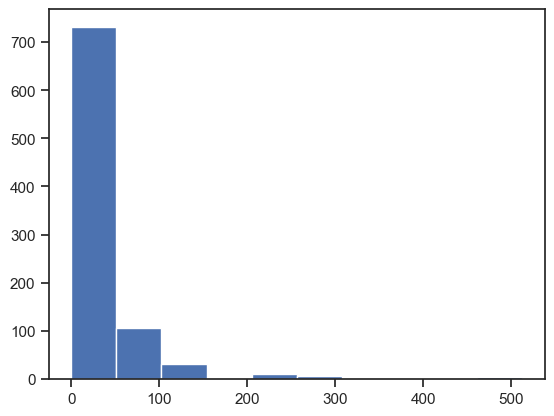

In [86]:
plt.hist(data['Fare'])
plt.show()

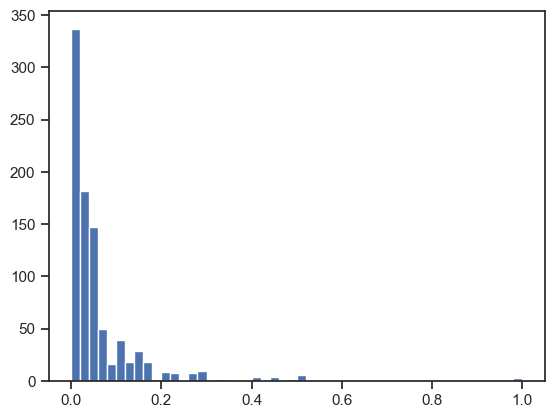

In [87]:
plt.hist(sc1_data, 50)
plt.show()

## Масштабирование данных на основе Z-оценки - StandardScaler

In [88]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Fare']])

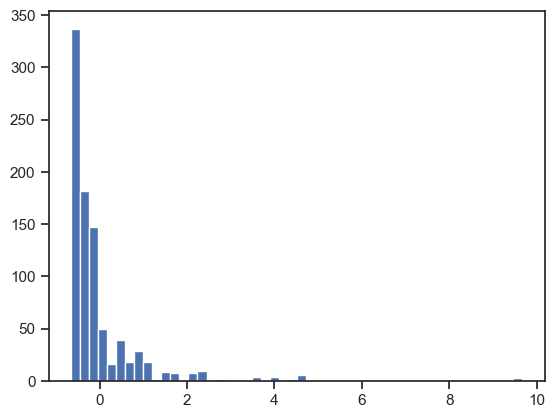

In [89]:
plt.hist(sc2_data, 50)
plt.show()